# Week 3 - Classification
Wanitchaya Poonpatanapricha

In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud_2020 #pip install -U git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

#All these packages need to be installed from pip
#For ML
import sklearn
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition

import numpy as np #arrays
import matplotlib.pyplot as plt #Plots
import matplotlib.colors # For nice colours
import seaborn #Makes plots look nice, also heatmaps
import scipy as sp #for interp

#These are from the standard library
import collections
import os
import os.path
import random
import re
import glob
import pandas
import requests
import json
import math

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

# Simple Simulated Examples

The five data patterns include: 
+ `random` in which the two classes are randomly distributed across both dimensions
+ `andSplit` in which the two classes are linearly split along one of two dimensions (e.g., men like Adidas)
+ `xorSplit` in which the two classes are split, oppositely, along each dimension (e.g., old ladies and young men like Nikes)
+ `targetSplit` in which one class is nested within the other in two dimensions (e.g., middle aged, middle income people like vintage Mustangs)
+ `multiBlobs` in which 5 classes are placed as bivariate Gaussians at random locations

Each pattern will be pair with low `noise` (0.1) once and high `noise` (0.7) once.

In [2]:
#Bayes
clf_bay = sklearn.naive_bayes.GaussianNB()

#Analogizes
clf_svc_linear = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up
clf_svc_poly = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
clf_knn = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

#Classical Regression
clf_logit = sklearn.linear_model.LogisticRegression()

#Symbolists
clf_tree = sklearn.tree.DecisionTreeClassifier()
clf_forest = sklearn.ensemble.RandomForestClassifier()

#Connectionists
clf_neural = sklearn.neural_network.MLPClassifier()

#Ensemble
clf_gb = sklearn.ensemble.GradientBoostingClassifier()

clfs = [clf_bay, clf_svc_linear, clf_svc_poly, clf_knn, clf_logit, 
       clf_tree, clf_forest, clf_neural, clf_gb]

In [3]:
np.random.seed(31415)

### Artificial Dataset 1

In [117]:
noise = .1
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.targetSplit(noise))

In [118]:
for clf in clfs:
    clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
    print(clf)
    print((lucem_illud_2020.evaluateClassifier(clf, dfTest)))
    print("\n")

GaussianNB(priors=None, var_smoothing=1e-09)
          Error_Rate    AUC  Precision  Average_Precision  Recall
Category                                                         
0              0.035  0.965   0.951456           0.942427    0.98
1              0.035  0.965   0.979381           0.955412    0.95


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
          Error_Rate    AUC  Precision  Average_Precision  Recall
Category                                                         
0              0.375  0.625   0.573964           0.571746    0.97
1              0.375  0.625   0.903226           0.612903    0.28


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=True, ra

/Users/wanitchaya.poon/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


According to AUC, **GaussianNB** do the best job when the data is `targetSplit` with low noise.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


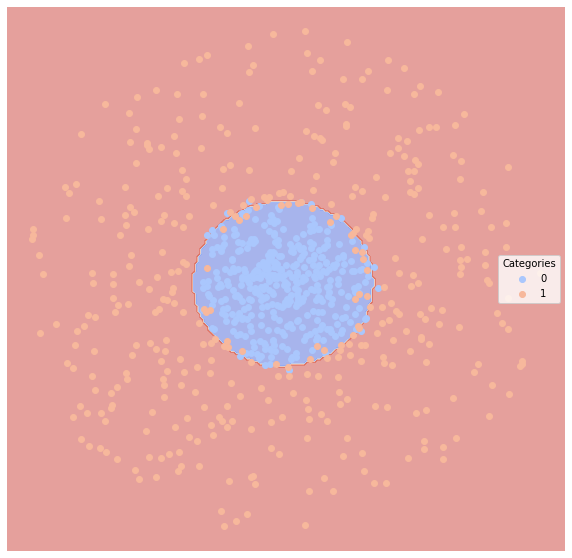

In [107]:
lucem_illud_2020.plotregions(clfs[0], dfTrain)

### Artificial Dataset 2

In [119]:
noise = .7
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.targetSplit(noise))

In [120]:
for clf in clfs:
    clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
    print(clf)
    print((lucem_illud_2020.evaluateClassifier(clf, dfTest)))
    print("\n")

GaussianNB(priors=None, var_smoothing=1e-09)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.435  0.568109    0.53913           0.518188  0.645833
1              0.435  0.568109    0.60000           0.559231  0.490385


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.48  0.521635   0.500000           0.491250  0.562500
1               0.48  0.521635   0.543478           0.531288  0.480769


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='

/Users/wanitchaya.poon/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.44  0.560497   0.539216           0.513926  0.572917
1               0.44  0.560497   0.581633           0.553779  0.548077


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
             

According to AUC, **GradientBoosting** do the best job when the data is `targetSplit` with high noise. Nevertheless, even the best model still yield high error rate because of the high noise.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


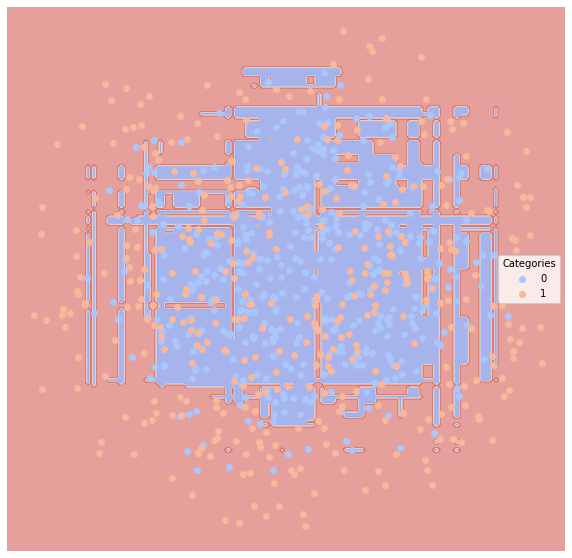

In [121]:
lucem_illud_2020.plotregions(clfs[-1], dfTrain)

### Artificial Dataset 3

In [122]:
noise = .1
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.random())

In [123]:
for clf in clfs:
    clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
    print(clf)
    print((lucem_illud_2020.evaluateClassifier(clf, dfTest)))
    print("\n")

GaussianNB(priors=None, var_smoothing=1e-09)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.49  0.509951   0.514851           0.510072  0.514851
1               0.49  0.509951   0.505051           0.500076  0.505051


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
          Error_Rate     AUC  Precision  Average_Precision    Recall
Category                                                            
0              0.495  0.5046   0.509259           0.507319  0.544554
1              0.495  0.5046   0.500000           0.497323  0.464646


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', m

According to AUC, **Neural Net** do the best job when the data is `random` with low noise. However, even the best model does not do that much better than chance since the data is completely random.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


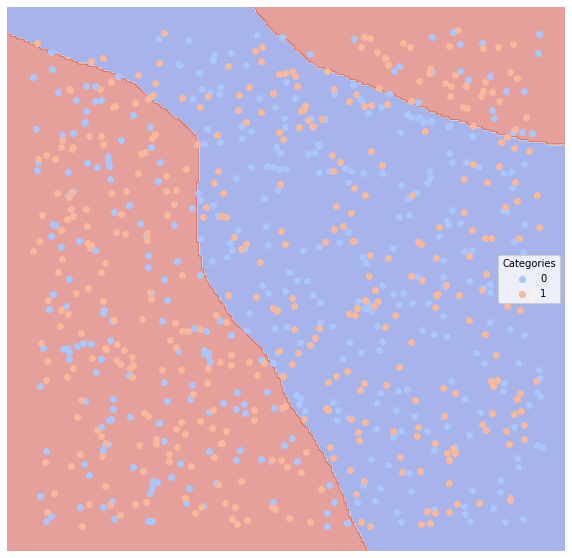

In [124]:
lucem_illud_2020.plotregions(clfs[-2], dfTrain)

### Artificial Dataset 4

In [125]:
noise = .7
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.random())

In [126]:
for clf in clfs:
    clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
    print(clf)
    print((lucem_illud_2020.evaluateClassifier(clf, dfTest)))
    print("\n")

GaussianNB(priors=None, var_smoothing=1e-09)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.51  0.506899   0.569444           0.563457  0.366071
1               0.51  0.506899   0.445312           0.443441  0.647727


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.495  0.511769   0.573034           0.565935  0.455357
1              0.495  0.511769   0.450450           0.445938  0.568182


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='

/Users/wanitchaya.poon/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.49  0.529627   0.602941           0.575720  0.366071
1               0.49  0.529627   0.462121           0.455334  0.693182


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.51  0.497159   0.556818           0.558608  0.437500
1               0.51  0.497159   0.437500           0.438608  0.556818


RandomForestClassifier(

According to AUC, **Neural Net** do the best job when the data is `random` with high noise. However, even the best model does not do that much better than chance since the data is completely random.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


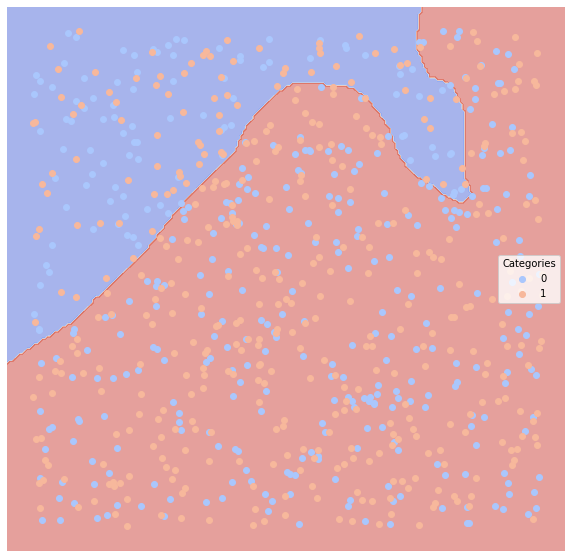

In [127]:
lucem_illud_2020.plotregions(clfs[-2], dfTrain)

### Artificial Dataset 5

In [128]:
noise = .1
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.andSplit(noise))

In [129]:
for clf in clfs:
    clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
    print(clf)
    print((lucem_illud_2020.evaluateClassifier(clf, dfTest)))
    print("\n")

GaussianNB(priors=None, var_smoothing=1e-09)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.08  0.921228   0.887640           0.854983  0.929412
1               0.08  0.921228   0.945946           0.913690  0.913043


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.08  0.921228   0.887640           0.854983  0.929412
1               0.08  0.921228   0.945946           0.913690  0.913043


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='

/Users/wanitchaya.poon/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


According to AUC, **KNN** do the best job when the data is `andSplit` with low noise.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


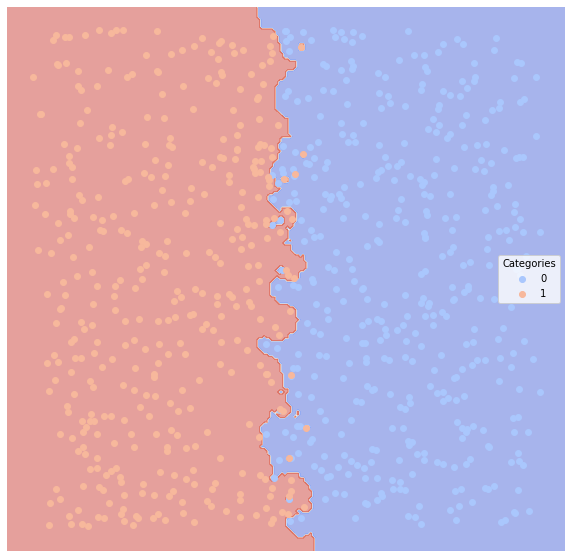

In [130]:
lucem_illud_2020.plotregions(clfs[3], dfTrain)

### Artificial Dataset 6

In [131]:
noise = .7
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.andSplit(noise))

In [132]:
for clf in clfs:
    clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
    print(clf)
    print((lucem_illud_2020.evaluateClassifier(clf, dfTest)))
    print("\n")

GaussianNB(priors=None, var_smoothing=1e-09)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.37  0.629667   0.618557           0.567612  0.618557
1               0.37  0.629667   0.640777           0.595595  0.640777


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.37  0.629667   0.618557           0.567612  0.618557
1               0.37  0.629667   0.640777           0.595595  0.640777


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='

According to AUC, **Neural Net** do the best job when the data is `andSplit` with high noise.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


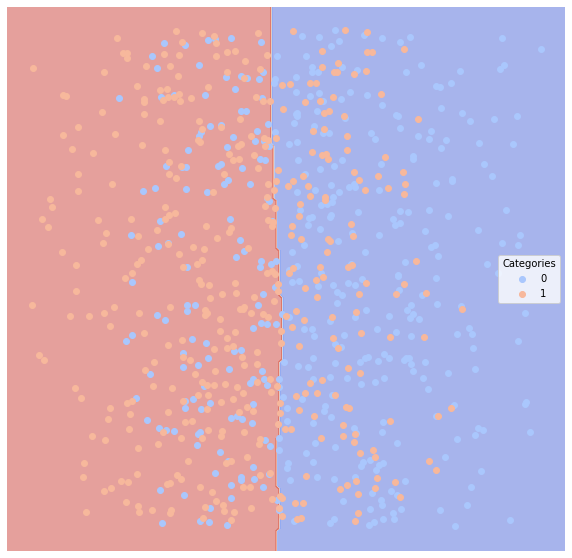

In [133]:
lucem_illud_2020.plotregions(clfs[-2], dfTrain)

### Artificial Dataset 7

In [134]:
noise = .1
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.xorSplit(noise))

In [135]:
for clf in clfs:
    clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
    print(clf)
    print((lucem_illud_2020.evaluateClassifier(clf, dfTest)))
    print("\n")

GaussianNB(priors=None, var_smoothing=1e-09)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.53  0.470988   0.463636           0.476280  0.520408
1               0.53  0.470988   0.477778           0.496416  0.421569


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.47  0.530012       0.52           0.505918  0.530612
1               0.47  0.530012       0.54           0.525882  0.529412


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='

/Users/wanitchaya.poon/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


According to AUC, **Decision Tree** do the best job when the data is `xorSplit` with low noise.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


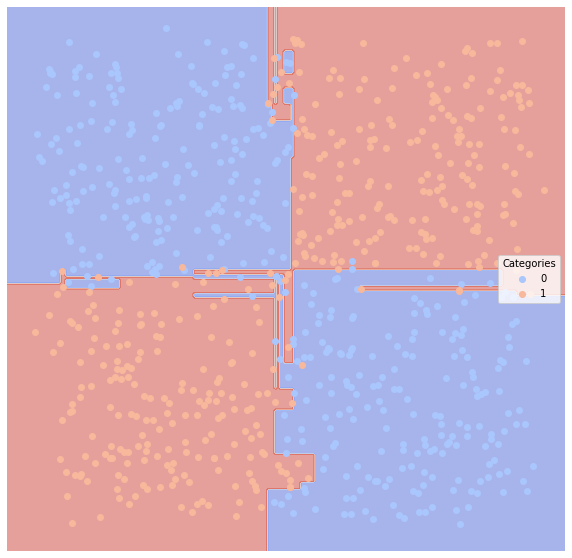

In [136]:
lucem_illud_2020.plotregions(clfs[-4], dfTrain)

### Artificial Dataset 8

In [137]:
noise = .7
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.xorSplit(noise))

In [138]:
for clf in clfs:
    clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
    print(clf)
    print((lucem_illud_2020.evaluateClassifier(clf, dfTest)))
    print("\n")

GaussianNB(priors=None, var_smoothing=1e-09)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.515  0.490666   0.462185           0.465427  0.585106
1              0.515  0.490666   0.518519           0.525451  0.396226


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.51  0.486351   0.454545           0.463424  0.425532
1               0.51  0.486351   0.517857           0.523356  0.547170


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='

According to AUC, **Neural Net** do the best job when the data is `xorSplit` with high noise.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


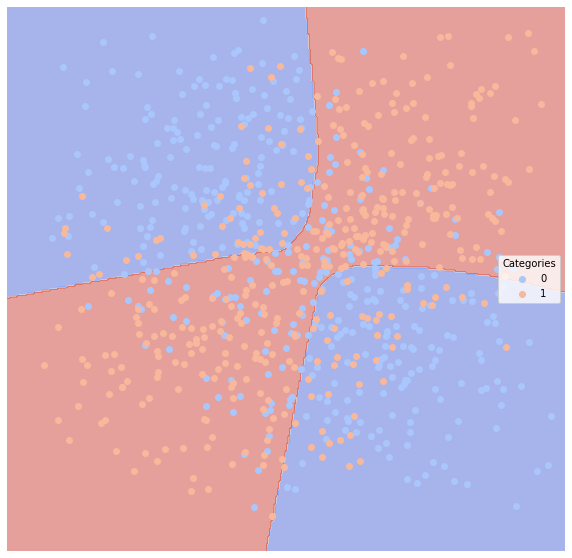

In [139]:
lucem_illud_2020.plotregions(clfs[-2], dfTrain)

### Artificial Dataset 9

In [140]:
noise = .1
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.multiBlobs(noise))

In [141]:
for clf in clfs:
    clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
    print(clf)
    print((lucem_illud_2020.evaluateClassifier(clf, dfTest)))
    print("\n")

GaussianNB(priors=None, var_smoothing=1e-09)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.000  1.000000   1.000000           1.000000  1.000000
1              0.000  1.000000   1.000000           1.000000  1.000000
2              0.106  0.845509   0.740741           0.614374  0.761905
3              0.094  0.841261   0.760870           0.610641  0.736842
4              0.012  0.979849   0.967033           0.941153  0.967033


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.000  1.000000   1.000000           1.000000  1.000000

/Users/wanitchaya.poon/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.000  1.000000   1.000000           1.000000  1.000000
1              0.000  1.000000   1.000000           1.000000  1.000000
2              0.110  0.828993   0.745098           0.597309  0.723810
3              0.102  0.840351   0.724490           0.589461  0.747368
4              0.012  0.979849   0.967033           0.941153  0.967033


Grad

According to AUC, **GaussianNB** do the best job when the data is `multiBlobs` with low noise.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

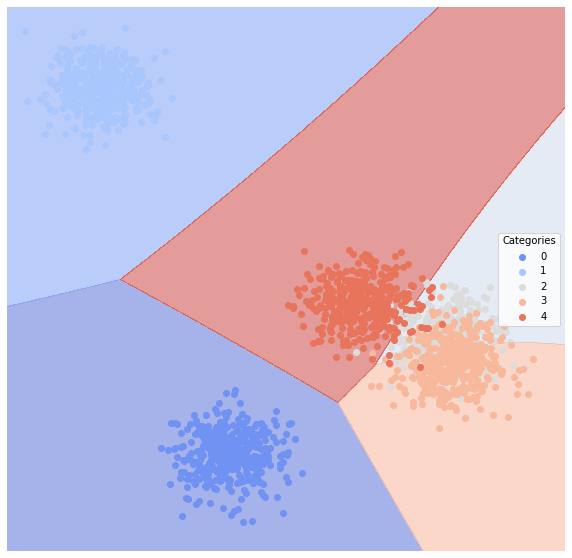

In [142]:
lucem_illud_2020.plotregions(clfs[0], dfTrain)

### Artificial Dataset 10

In [143]:
noise = .7
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.multiBlobs(noise))

In [144]:
for clf in clfs:
    clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
    print(clf)
    print((lucem_illud_2020.evaluateClassifier(clf, dfTest)))
    print("\n")

GaussianNB(priors=None, var_smoothing=1e-09)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.036  0.953000   0.878788           0.834092  0.935484
1              0.122  0.814862   0.723810           0.573347  0.703704
2              0.002  0.998775   0.989247           0.989247  1.000000
3              0.160  0.791112   0.558333           0.451961  0.712766
4              0.224  0.632869   0.506024           0.330080  0.371681


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.038  0.947624   0.877551           0.825499  0.924731

According to AUC, **GaussianNB** do the best job when the data is `multiBlobs` with high noise.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

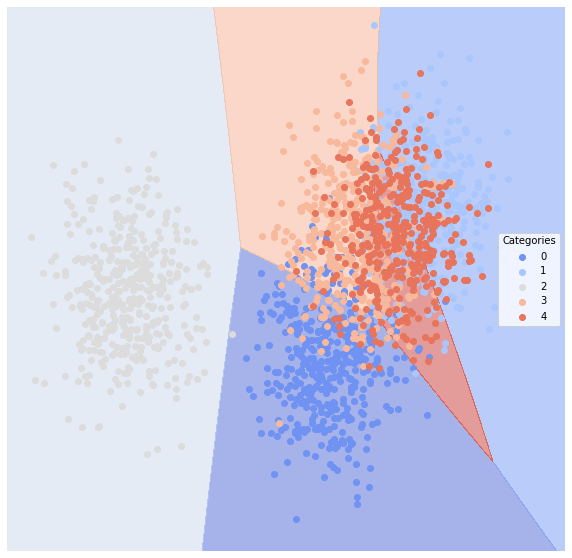

In [145]:
lucem_illud_2020.plotregions(clfs[0], dfTrain)

# Real data

### Reddit

In [4]:
from sklearn import datasets
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadReddit())

Loading Reddit data
Converting to vectors


In [147]:
for clf in clfs:
    clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
    print(clf)
    print((lucem_illud_2020.evaluateClassifier(clf, dfTest)))
    print("\n")

GaussianNB(priors=None, var_smoothing=1e-09)
                         Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                      
Relationships              0.169279  0.715762   0.716981           0.476092   
Bad Roommates              0.150470  0.790660   0.776316           0.606097   
Weeaboo Tales              0.191223  0.856400   0.558140           0.541303   
Tales From Tech Support    0.072100  0.866770   0.934426           0.760381   

                           Recall  
Category                           
Relationships            0.493506  
Bad Roommates            0.655556  
Weeaboo Tales            0.947368  
Tales From Tech Support  0.750000  


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
                  

/Users/wanitchaya.poon/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


                         Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                      
Relationships              0.241379  0.500000   0.000000           0.241379   
Bad Roommates              0.282132  0.500000   0.000000           0.282132   
Weeaboo Tales              0.115987  0.756579   1.000000           0.629145   
Tales From Tech Support    0.639498  0.580247   0.271429           0.271429   

                           Recall  
Category                           
Relationships            0.000000  
Bad Roommates            0.000000  
Weeaboo Tales            0.513158  
Tales From Tech Support  1.000000  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')
                         Error_Rate       AUC  Precision  Average_Precision  \
Category                                

From AUC, **Linear SVC** is the best model.

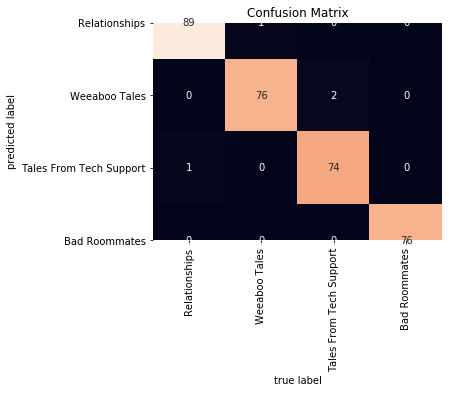

In [148]:
lucem_illud_2020.plotConfusionMatrix(clfs[1], dfTest)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

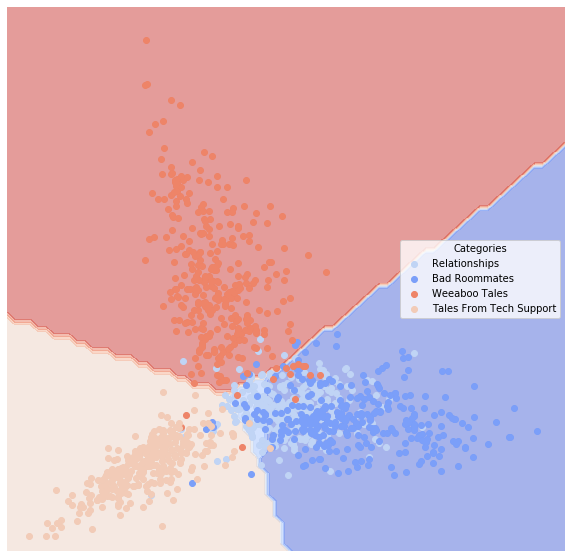

In [150]:
lucem_illud_2020.plotregions(clfs[1], dfTrain)

### News

In [152]:
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadNewsGroups())

Loading data for: comp.sys.mac.hardware
Loading data for: comp.windows.x
Loading data for: misc.forsale
Loading data for: rec.autos
Converting to vectors


In [153]:
for clf in clfs:
    clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
    print(clf)
    print((lucem_illud_2020.evaluateClassifier(clf, dfTest)))
    print("\n")

GaussianNB(priors=None, var_smoothing=1e-09)
                       Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                    
misc.forsale             0.106383  0.835089   0.750000           0.606340   
comp.windows.x           0.085106  0.904241   0.829787           0.764006   
comp.sys.mac.hardware    0.157447  0.807565   0.669231           0.559373   
rec.autos                0.102128  0.842146   0.854369           0.691572   

                         Recall  
Category                         
misc.forsale           0.734694  
comp.windows.x         0.879699  
comp.sys.mac.hardware  0.737288  
rec.autos              0.727273  


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
                       Error_Rate       AU

/Users/wanitchaya.poon/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


                       Error_Rate  AUC  Precision  Average_Precision  Recall
Category                                                                    
misc.forsale             0.791489  0.5   0.208511           0.208511     1.0
comp.windows.x           0.282979  0.5   0.000000           0.282979     0.0
comp.sys.mac.hardware    0.251064  0.5   0.000000           0.251064     0.0
rec.autos                0.257447  0.5   0.000000           0.257447     0.0


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')
                       Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                    
misc.forsale             0.242553  0.542380   0.340000           0.231320   
comp.windows.x           0.246809  0.563910   1.000000           0.374628   
comp.sys.mac.hardware    0.372340  0.554

From AUC, **Linear SVC** is the best model.

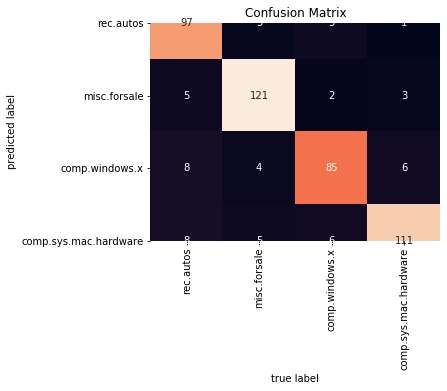

In [154]:
lucem_illud_2020.plotConfusionMatrix(clfs[1], dfTest)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

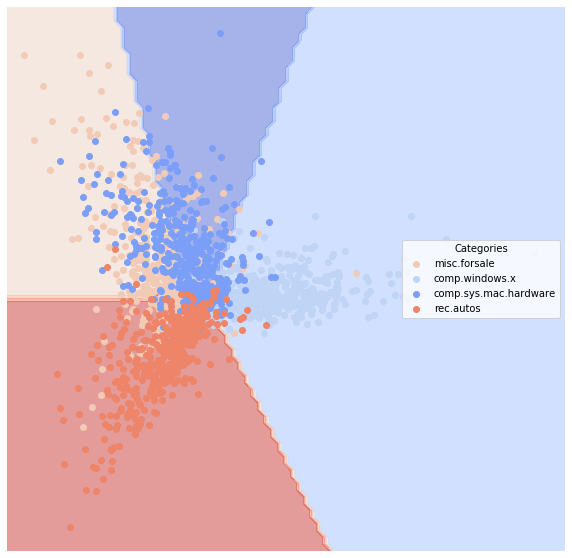

In [155]:
lucem_illud_2020.plotregions(clfs[1], dfTrain)

### Senate (Small)

In [156]:
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSenateSmall())

Loading senate data
Converting to vectors


In [157]:
for clf in clfs:
    clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
    print(clf)
    print((lucem_illud_2020.evaluateClassifier(clf, dfTest)))
    print("\n")

GaussianNB(priors=None, var_smoothing=1e-09)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
Obama        0.14956  0.847648   0.831081           0.762307  0.825503
Clinton      0.14956  0.847648   0.865285           0.825931  0.869792


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
Obama       0.002933  0.997396   0.993333           0.993333  1.000000
Clinton     0.002933  0.997396   1.000000           0.997724  0.994792


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='

/Users/wanitchaya.poon/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


          Error_Rate  AUC  Precision  Average_Precision  Recall
Category                                                       
Obama        0.43695  0.5    0.00000            0.43695     0.0
Clinton      0.43695  0.5    0.56305            0.56305     1.0


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
Obama       0.117302  0.877796   0.886525           0.814110  0.838926
Clinton     0.117302  0.877796   0.880000           0.853587  0.916667


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol

From AUC, **Linear SVC**, **Decision Tree**, and **Gradient Boosting** are the best models.

#### Linear SVC

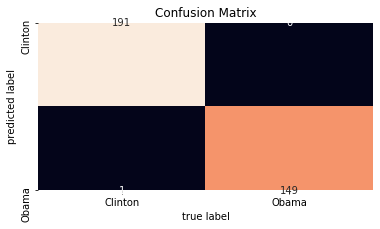

In [160]:
lucem_illud_2020.plotConfusionMatrix(clfs[1], dfTest)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


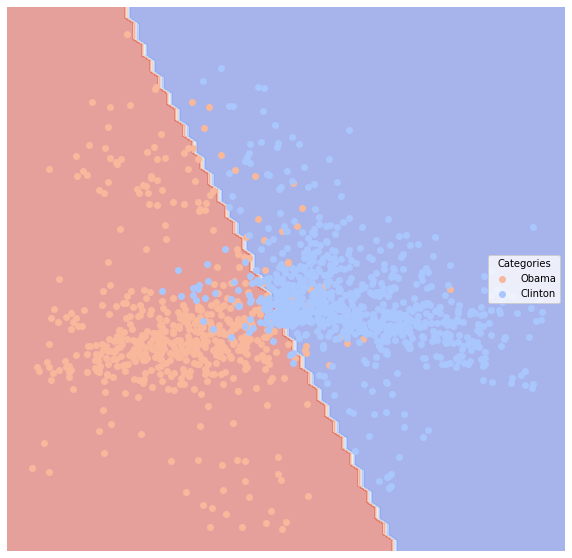

In [161]:
lucem_illud_2020.plotregions(clfs[1], dfTrain)

### Senate (Large)

In [170]:
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSenateLarge())

Loading senator: Kennedy
Loading senator: Kerry
Loading senator: Klobuchar
Loading senator: Kohl
Loading senator: Kyl
Converting to vectors


In [172]:
for clf in clfs:
    clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
    print(clf)
    print((lucem_illud_2020.evaluateClassifier(clf, dfTest)))
    print("\n")

GaussianNB(priors=None, var_smoothing=1e-09)
           Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                               
Kerry        0.157692  0.763121   0.776398           0.569320  0.589623
Kyl          0.075641  0.717989   0.895833           0.466353  0.443299
Klobuchar    0.051282  0.780166   0.960784           0.589849  0.563218
Kohl         0.046154  0.722917   0.900000           0.447308  0.450000
Kennedy      0.251282  0.778387   0.630612           0.620648  0.953704


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
           Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                               
Kerry        0.017949  0.974372   0.975962           0.946068

/Users/wanitchaya.poon/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


           Error_Rate  AUC  Precision  Average_Precision  Recall
Category                                                        
Kerry        0.271795  0.5   0.000000           0.271795     0.0
Kyl          0.124359  0.5   0.000000           0.124359     0.0
Klobuchar    0.111538  0.5   0.000000           0.111538     0.0
Kohl         0.076923  0.5   0.000000           0.076923     0.0
Kennedy      0.584615  0.5   0.415385           0.415385     1.0


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')
           Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                               
Kerry        0.139744  0.779880   0.836601           0.612810  0.603774
Kyl          0.048718  0.830659   0.915493           0.654500  0.670103
Klobuchar    0.039744  0.857018   0.900000           0.682493  0.72

From AUC, **Gradient Boosting** is the best model. It is actually almost perfect!

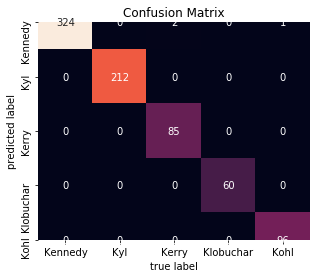

In [173]:
lucem_illud_2020.plotConfusionMatrix(clfs[-1], dfTest)

### Email

In [175]:
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSpam())

Loading Spam
Loading Ham
Converting to vectors


In [176]:
for clf in clfs:
    clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
    print(clf)
    print((lucem_illud_2020.evaluateClassifier(clf, dfTest)))
    print("\n")

GaussianNB(priors=None, var_smoothing=1e-09)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
spam        0.150585  0.812363   0.490323           0.407733  0.760000
not spam    0.150585  0.812363   0.954631           0.940992  0.864726


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
spam        0.086257  0.738151   0.859649           0.495789  0.490000
not spam    0.086257  0.738151   0.918660           0.917772  0.986301


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='

/Users/wanitchaya.poon/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


          Error_Rate  AUC  Precision  Average_Precision  Recall
Category                                                       
spam        0.146199  0.5   0.000000           0.146199     0.0
not spam    0.146199  0.5   0.853801           0.853801     1.0


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
spam        0.089181  0.732295   0.842105           0.480234  0.480000
not spam    0.089181  0.732295   0.917065           0.916090  0.984589


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol

From AUC, **Neural Net** is the best models.

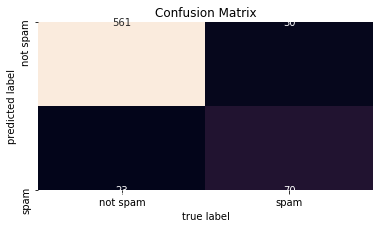

In [177]:
lucem_illud_2020.plotConfusionMatrix(clfs[-2], dfTest)

## <span style="color:red">*Exercise 1*</span>
<span style="color:red">Go back through all of the cells above and generate 10 distinct artificial datasets and classify them with all of the available methods. Add a cell immediately below and describe which classifier(s) worked best with which artificially constructed data source and why. Then go through all of the empirical datasets (i.e., Newsgroups, Senate Small, Senate Large, Email Spam) and classify them with all available methods. Add a second cell immediately below and describe which classifier(s) worked best with which data set and why.
    
### Conclusion for Artificial Datasets
* When the noise or randomness is high, **Neural Net** typically performs best. This is because Neural Net is the most flexible model.
* When there is not much noise, the best model depends on the underlying patterns in the dataset. In this case, the underlying patterns depend on the function used to generate the artificial data. For example, GaussianNB is the best model for `multiBlobs` because each generated blob is Gaussian!

### Conclusion for Real Datasets
* For Reddit, News, and Senate (small) datasets, **Linear SVC** is the best model. 
* For Senate (large) dataset, **Gradient Boosting** is the best model. However, **Linear SVC** also performs quite well.
* For Emails, **Neural Net** is the best model. Unlike other datasets, Linear SVC does not perform that well.
* My guess is that in Reddit, News, Senate (small), and Senate (Large), each document category is quite different from the others. Hence, **Linear SVC** can easily learn and separate the categories. 
* On the other hand, spam emails try to be similar to actual emails. Hence, the differences between categories are not as obvious as in other datasets. Thus, simpler model like **Linear SVC** doesn't work well and more flexible model like **Neural Net** is needed.


<span style="color:red">***Stretch*** (but also required) Wander through the SKLearn documentation available [here](http://scikit-learn.org/stable/), particularly perusing the classifiers. In cells following, identify and implement a new classifier that we have not yet used (e.g., AdaBoost, CART) on one artificial dataset and one real dataset (used above). Then, in the next cell describe the classifier, detail how it compares with the approaches above, and why it performed better or worse than others.

### Artificial Dataset 10

In [5]:
noise = .7
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.multiBlobs(noise))

In [6]:
from sklearn import semi_supervised

In [7]:
clf_semi = sklearn.semi_supervised.LabelPropagation()

In [9]:
for clf in clfs + [clf_semi]:
    clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
    print(clf)
    print((lucem_illud_2020.evaluateClassifier(clf, dfTest)))
    print("\n")

GaussianNB(priors=None, var_smoothing=1e-09)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.052  0.918750   0.870000           0.782900  0.870000
1              0.084  0.866396   0.755319           0.633863  0.788889
2              0.030  0.959176   0.931034           0.888363  0.939130
3              0.130  0.764634   0.650602           0.462361  0.600000
4              0.064  0.907052   0.841121           0.750961  0.857143


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.052  0.922500   0.862745           0.783216  0.880000

### Senate (Small)

In [156]:
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSenateSmall())

Loading senate data
Converting to vectors


In [13]:
for clf in clfs + [clf_semi]:
    clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
    print(clf)
    print((lucem_illud_2020.evaluateClassifier(clf, dfTest)))
    print("\n")

GaussianNB(priors=None, var_smoothing=1e-09)
                       Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                    
comp.windows.x           0.074468  0.918667   0.830882           0.776650   
comp.sys.mac.hardware    0.131915  0.826520   0.709402           0.590028   
rec.autos                0.082979  0.869773   0.862745           0.725064   
misc.forsale             0.127660  0.824954   0.765217           0.626735   

                         Recall  
Category                         
comp.windows.x         0.904000  
comp.sys.mac.hardware  0.747748  
rec.autos              0.778761  
misc.forsale           0.727273  


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
                       Error_Rate       AU

/Users/wanitchaya.poon/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


                       Error_Rate  AUC  Precision  Average_Precision  Recall
Category                                                                    
comp.windows.x           0.265957  0.5   0.000000           0.265957     0.0
comp.sys.mac.hardware    0.236170  0.5   0.000000           0.236170     0.0
rec.autos                0.759574  0.5   0.240426           0.240426     1.0
misc.forsale             0.257447  0.5   0.000000           0.257447     0.0


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')
                       Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                    
comp.windows.x           0.240426  0.558203   0.800000           0.334315   
comp.sys.mac.hardware    0.312766  0.521431   0.280488           0.245353   
rec.autos                0.578723  0.534

From `sklearn` documentation:
> Semi-supervised learning is a situation in which in your training data some of the samples are not labeled. The semi-supervised estimators in sklearn.semi_supervised are able to make use of this additional unlabeled data to better capture the shape of the underlying data distribution and generalize better to new samples. These algorithms can perform well when we have a very small amount of labeled points and a large amount of unlabeled points.

In the *artificial dataset 10*, semi-supervised learning doesn't work as well as other models such as logistic regression, gradient boosting, etc. It performs as well as the rest of the models. This is likely because there is no additional unlabeled data.

In the *Senate (small) dataset*, semi-supervised learning actually performs very badly! This is likely because there is no additional unlabeled data.

This method will be useful for my dataset below, where some observations are unlabeled!

## <span style="color:red">*Exercise 2*</span>

<span style="color:red">In the cells immediately following, perform Logistic and Naïve Bayes classification (binary or multinomial) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project (e.g., these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week). Visualize the confusion matrix for training and testing sets. Calculate precision, recall, the F-measure, and AUC, then perform an ROC visualization. How do these classifiers perform? Exrapolate codes from these models to all uncoded data.


### Data

The data of a CMC in English was obtained from the official Discord server of Tsuki Adventure, a free-to-play mobile game. Discord is a proprietary freeware VoIP application and digital distribution platform designed for video gaming communities that specializes in text, image, video and audio communication between users in a chat channel.

What is special about this data is that each user in this community is asked to tag one's user profile with the user's primary language other than English. However, the language tagging is not mandatory. Hence, there are significant number of the users in this community that did not tag themselves and are labeled as 'en' in the dataset. 

I would like to build a classifier that classifies these non-tagged users' primary language into 'East Asian', 'South East Asian', and 'European' languages.

In [14]:
import pandas as pd
tsuki = pd.read_csv('tsuki_language.csv')

# only data with language tag
tsuki_label = tsuki[tsuki['language'] != 'en']
tsuki_label['language'] = tsuki_label['language'].replace(['hk','tw','sq', 'cn', 'jp', 'kr'], 'east')
tsuki_label['language'] = tsuki_label['language'].replace(['th', 'my', 'id', 'vn', 'ph'], 'sea')
tsuki_label['language'] = tsuki_label['language'].replace(['ru','de','es','pt','fr'], 'eu')
tsuki_label['category'] = tsuki_label['language']

# setting no-tag data separately
tsuki_extra = tsuki[tsuki['language'] == 'en']
tsuki_extra['language'] = tsuki_extra['language'].replace('en', np.NaN)
tsuki_extra['category'] = tsuki_extra['language']

/Users/wanitchaya.poon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/wanitchaya.poon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/wanitchaya.poon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [15]:
tsuki_label['tokenized_text'] = tsuki_label['content'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
tsuki_label['normalized_text'] = tsuki_label['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

/Users/wanitchaya.poon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/wanitchaya.poon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
holdBackFraction = .3
train_ng_df, test_ng_df = lucem_illud_2020.trainTestSplit(tsuki_label, holdBackFraction=holdBackFraction)

In [17]:
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform(train_ng_df['content'])
train_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]

### Multinomial NB

In [18]:
Mnb_ng = sklearn.naive_bayes.MultinomialNB()
Mnb_ng.fit(np.stack(train_ng_df['vect'], axis = 0), train_ng_df['category'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [19]:
train_ng_df['Mnb_predict'] = Mnb_ng.predict(np.stack(train_ng_df['vect'], axis=0))
print("Training score:")
print(Mnb_ng.score(np.stack(train_ng_df['vect'], axis=0), train_ng_df['category']))

Training score:
0.6743956586087815


In [21]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_ng_df['content'])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_ng_df['Mnb_predict'] = Mnb_ng.predict(np.stack(test_ng_df['vect'], axis=0))

#Test
print("Testing score:")
print(Mnb_ng.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))

Testing score:
0.5368663594470046


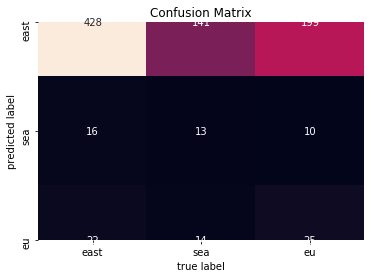

In [22]:
lucem_illud_2020.plotConfusionMatrix(Mnb_ng, test_ng_df)

In [23]:
print(sklearn.metrics.precision_score(test_ng_df['category'], test_ng_df['Mnb_predict'], average = 'weighted')) #precision
print(sklearn.metrics.recall_score(test_ng_df['category'], test_ng_df['Mnb_predict'], average = 'weighted')) #recall
print(sklearn.metrics.f1_score(test_ng_df['category'], test_ng_df['Mnb_predict'], average = 'weighted')) #F-1 measure

0.4741930368789504
0.5368663594470046
0.4424158102243756


In [24]:
lucem_illud_2020.metrics.evaluateClassifier(Mnb_ng, test_ng_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
east,0.435484,0.536342,0.557292,0.555626,0.918455
sea,0.282258,0.525028,0.409836,0.284569,0.106838
eu,0.208525,0.520119,0.333333,0.204365,0.077381


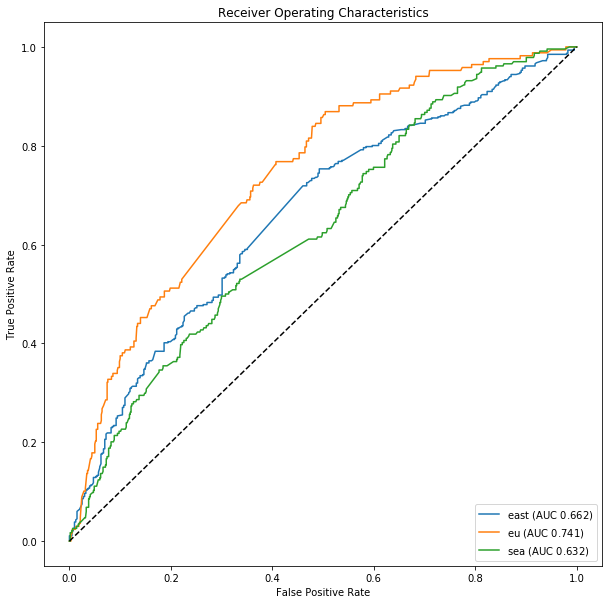

In [25]:
lucem_illud_2020.plotMultiROC(Mnb_ng, test_ng_df)

### Logistic Regression

In [26]:
logit_ng = sklearn.linear_model.LogisticRegression()
logit_ng.fit(np.stack(train_ng_df['vect'], axis = 0), train_ng_df['category'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
train_ng_df['logit_predict'] = logit_ng.predict(np.stack(train_ng_df['vect'], axis=0))
print("Training score:")
print(logit_ng.score(np.stack(train_ng_df['vect'], axis=0), train_ng_df['category']))

Training score:
0.6482486433152442


In [28]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_ng_df['content'])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_ng_df['logit_predict'] = logit_ng.predict(np.stack(test_ng_df['vect'], axis=0))

#Test
print("Testing score:")
print(logit_ng.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))

Testing score:
0.5529953917050692


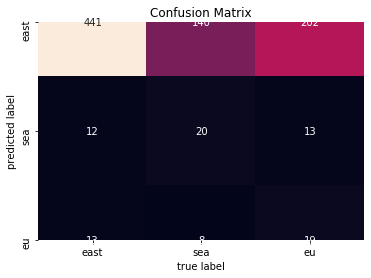

In [30]:
lucem_illud_2020.plotConfusionMatrix(logit_ng, test_ng_df)

In [31]:
print(sklearn.metrics.precision_score(test_ng_df['category'], test_ng_df['logit_predict'], average = 'weighted')) #precision
print(sklearn.metrics.recall_score(test_ng_df['category'], test_ng_df['logit_predict'], average = 'weighted')) #recall
print(sklearn.metrics.f1_score(test_ng_df['category'], test_ng_df['logit_predict'], average = 'weighted')) #F-1 measure

0.5164475078129138
0.5529953917050692
0.4528510470112935


In [32]:
lucem_illud_2020.metrics.evaluateClassifier(logit_ng, test_ng_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
east,0.422811,0.547803,0.563218,0.561805,0.946352
sea,0.271889,0.524037,0.475000,0.286264,0.081197
eu,0.199309,0.541667,0.444444,0.223417,0.119048


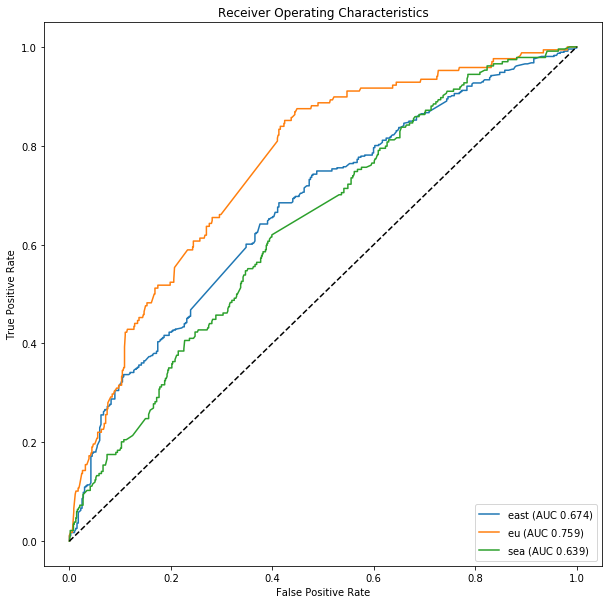

In [33]:
lucem_illud_2020.plotMultiROC(logit_ng, test_ng_df)

**Logistic regression** performs better than **Multinomial NB**. However, both models still perform pretty badly, especially on the South East Asian label. This is likely because the classification is not on the text's topic, but on underlying language characteristic. It is a lot harder to do so from just TF-IDF feature. Also, the dataset is heavy with the East Asian label. Hence the classifier just being bias toward the East Asian label in most cases.

### Extrapolation

In [34]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(tsuki_extra['content'])
tsuki_extra['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
tsuki_extra['logit_predict'] = logit_ng.predict(np.stack(tsuki_extra['vect'], axis=0))
tsuki_extra['Mnb_predict'] = Mnb_ng.predict(np.stack(tsuki_extra['vect'], axis=0))

tsuki_extra[['logit_predict','Mnb_predict']][20:30]

/Users/wanitchaya.poon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/wanitchaya.poon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/wanitchaya.poon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

,logit_predict,Mnb_predict
205,east,east
206,east,east
207,east,east
208,east,east
215,eu,eu
216,east,east
221,east,east
224,east,east
225,sea,sea
230,east,east


# Decision Trees

## <span style="color:red">*Exercise 3*</span>

<span style="color:red">In the cells immediately following, perform decision tree and random forest classification (binary, multinomial or continuous) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. As with ***Exercise 2***, these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week. Visualize the classification of data points. Calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Now build an ensemble classifier by bagging trees into a random forest. Visualize the result. How do these classifiers perform? What does ensemble learning do?

### Decision Tree

In [35]:
tree_ng = sklearn.tree.DecisionTreeClassifier(max_depth=10)
tree_ng.fit(np.stack(train_ng_df['vect'], axis = 0), train_ng_df['category'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [36]:
train_ng_df['tree_predict'] = tree_ng.predict(np.stack(train_ng_df['vect'], axis=0))
print("Training score:")
print(tree_ng.score(np.stack(train_ng_df['vect'], axis=0), train_ng_df['category']))

Training score:
0.611248149975333


In [37]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_ng_df['content'])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_ng_df['tree_predict'] = tree_ng.predict(np.stack(test_ng_df['vect'], axis=0))

#Test
print("Testing score:")
print(tree_ng.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))

Testing score:
0.5495391705069125


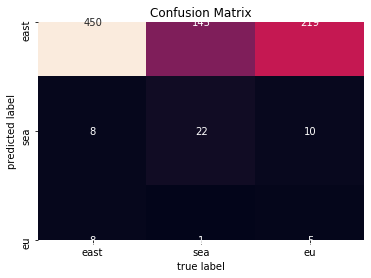

In [38]:
lucem_illud_2020.plotConfusionMatrix(tree_ng, test_ng_df)

In [39]:
print(sklearn.metrics.precision_score(test_ng_df['category'], test_ng_df['tree_predict'], average = 'weighted')) #precision
print(sklearn.metrics.recall_score(test_ng_df['category'], test_ng_df['tree_predict'], average = 'weighted')) #recall
print(sklearn.metrics.f1_score(test_ng_df['category'], test_ng_df['tree_predict'], average = 'weighted')) #F-1 measure

0.4995255025208941
0.5495391705069125
0.4292974601491121


In [40]:
lucem_illud_2020.metrics.evaluateClassifier(tree_ng, test_ng_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
east,0.437788,0.530096,0.552826,0.552278,0.965665
sea,0.274194,0.503586,0.357143,0.271456,0.021368
eu,0.188940,0.552619,0.550000,0.240227,0.130952


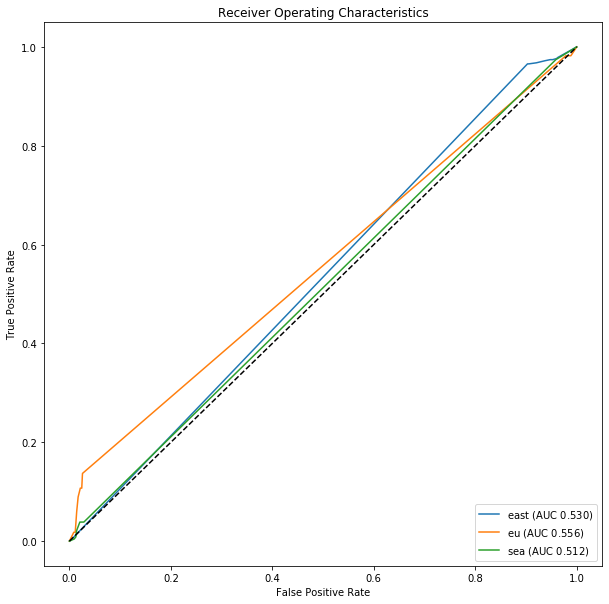

In [41]:
lucem_illud_2020.plotMultiROC(tree_ng, test_ng_df)

Tree performs really badly. This might be because the model overfits to the training data.

### Random Forest

In [42]:
rf_ng = sklearn.ensemble.RandomForestClassifier()
rf_ng.fit(np.stack(train_ng_df['vect'], axis = 0), train_ng_df['category'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
train_ng_df['rf_predict'] = rf_ng.predict(np.stack(train_ng_df['vect'], axis=0))
print("Training score:")
print(rf_ng.score(np.stack(train_ng_df['vect'], axis=0), train_ng_df['category']))

Training score:
0.8041440552540701


In [44]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_ng_df['content'])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_ng_df['rf_predict'] = rf_ng.predict(np.stack(test_ng_df['vect'], axis=0))

#Test
print("Testing score:")
print(rf_ng.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))

Testing score:
0.5426267281105991


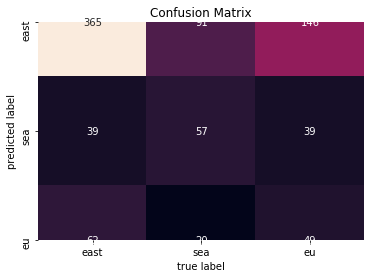

In [45]:
lucem_illud_2020.plotConfusionMatrix(rf_ng, test_ng_df)

In [46]:
print(sklearn.metrics.precision_score(test_ng_df['category'], test_ng_df['rf_predict'], average = 'weighted')) #precision
print(sklearn.metrics.recall_score(test_ng_df['category'], test_ng_df['rf_predict'], average = 'weighted')) #recall
print(sklearn.metrics.f1_score(test_ng_df['category'], test_ng_df['rf_predict'], average = 'weighted')) #F-1 measure

0.5080663354029814
0.5426267281105991
0.5121611950498728


In [47]:
lucem_illud_2020.metrics.evaluateClassifier(rf_ng, test_ng_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
east,0.389401,0.596855,0.606312,0.591261,0.783262
sea,0.307604,0.540032,0.374046,0.291459,0.209402
eu,0.217742,0.613929,0.422222,0.271134,0.339286


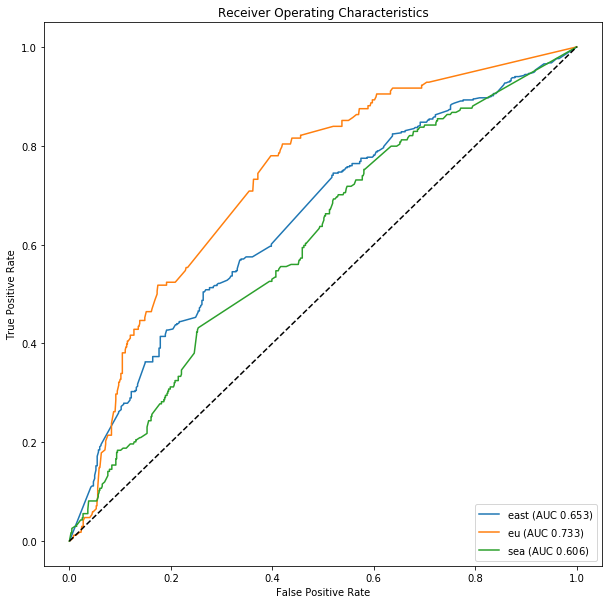

In [48]:
lucem_illud_2020.plotMultiROC(rf_ng, test_ng_df)

Random forest has a very high training data but still not that good on testing. It does not bias toward East Asian as much as other models.

### Bagging

In [50]:
tree = sklearn.tree.DecisionTreeClassifier(max_depth=10)
bg_ng = sklearn.ensemble.BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1) 
bg_ng.fit(np.stack(train_ng_df['vect'], axis = 0), train_ng_df['category'])

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=10,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
      

In [51]:
train_ng_df['bg_predict'] = bg_ng.predict(np.stack(train_ng_df['vect'], axis=0))
print("Training score:")
print(bg_ng.score(np.stack(train_ng_df['vect'], axis=0), train_ng_df['category']))

Training score:
0.6023680315737543


In [52]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_ng_df['content'])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_ng_df['bg_predict'] = bg_ng.predict(np.stack(test_ng_df['vect'], axis=0))

#Test
print("Testing score:")
print(bg_ng.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))

Testing score:
0.5368663594470046


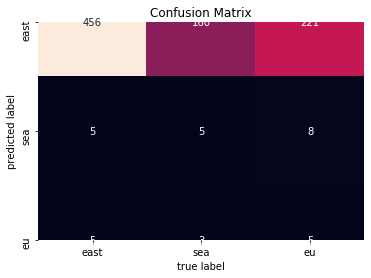

In [53]:
lucem_illud_2020.plotConfusionMatrix(bg_ng, test_ng_df)

In [54]:
print(sklearn.metrics.precision_score(test_ng_df['category'], test_ng_df['bg_predict'], average = 'weighted')) #precision
print(sklearn.metrics.recall_score(test_ng_df['category'], test_ng_df['bg_predict'], average = 'weighted')) #recall
print(sklearn.metrics.f1_score(test_ng_df['category'], test_ng_df['bg_predict'], average = 'weighted')) #F-1 measure

0.44993640883339114
0.5368663594470046
0.3970854592772265


In [55]:
lucem_illud_2020.metrics.evaluateClassifier(bg_ng, test_ng_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
east,0.450461,0.515390,0.544803,0.544633,0.978541
sea,0.273041,0.504375,0.384615,0.272043,0.021368
eu,0.202765,0.505595,0.277778,0.196055,0.029762


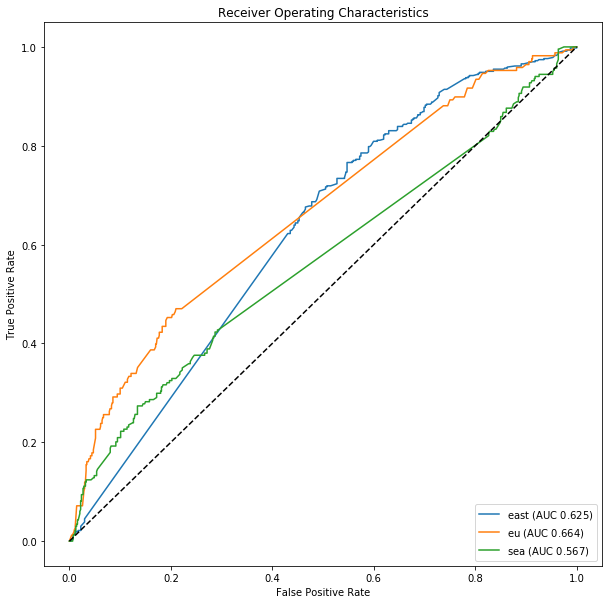

In [56]:
lucem_illud_2020.plotMultiROC(bg_ng, test_ng_df)

Bagging performs a bit better than tree but bias toward East Asian label even more. **Random forest** still performs the best. Likely because random forest overfits training data the least.

### Extrapolation

In [57]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(tsuki_extra['content'])
tsuki_extra['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
tsuki_extra['tree_predict'] = tree_ng.predict(np.stack(tsuki_extra['vect'], axis=0))
tsuki_extra['rf_predict'] = rf_ng.predict(np.stack(tsuki_extra['vect'], axis=0))
tsuki_extra['bg_predict'] = bg_ng.predict(np.stack(tsuki_extra['vect'], axis=0))

tsuki_extra[['tree_predict','rf_predict','bg_predict']][20:30]

/Users/wanitchaya.poon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/wanitchaya.poon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/wanitchaya.poon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

,tree_predict,rf_predict,bg_predict
205,east,east,east
206,east,east,east
207,east,east,east
208,east,east,east
215,eu,eu,east
216,east,eu,east
221,east,eu,east
224,east,east,east
225,east,sea,east
230,east,eu,east


Tree and Bagging predict similarly to each other. Random forest's predictions are more different.

# K-Nearest Neighbors

## <span style="color:red">*Exercise 4*</span>

<span style="color:red">In the cells immediately following, perform and visualize k-nearest neighbor classification using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. Visualize the classification of data points and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Articulate how the *k*-nearest neighbor approach relates to *k*-means clustering explored in ***week 3***?

In [59]:
knn_ng = sklearn.neighbors.KNeighborsClassifier(15)
knn_ng.fit(np.stack(train_ng_df['vect'], axis = 0), train_ng_df['category'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [60]:
train_ng_df['knn_predict'] = knn_ng.predict(np.stack(train_ng_df['vect'], axis=0))
print("Training score:")
print(knn_ng.score(np.stack(train_ng_df['vect'], axis=0), train_ng_df['category']))

Training score:
0.6073014306857425


In [61]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_ng_df['content'])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_ng_df['knn_predict'] = knn_ng.predict(np.stack(test_ng_df['vect'], axis=0))

#Test
print("Testing score:")
print(knn_ng.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))

Testing score:
0.5552995391705069


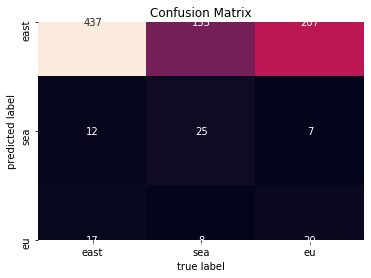

In [62]:
lucem_illud_2020.plotConfusionMatrix(knn_ng, test_ng_df)

In [63]:
print(sklearn.metrics.precision_score(test_ng_df['category'], test_ng_df['knn_predict'], average = 'weighted')) #precision
print(sklearn.metrics.recall_score(test_ng_df['category'], test_ng_df['knn_predict'], average = 'weighted')) #recall
print(sklearn.metrics.f1_score(test_ng_df['category'], test_ng_df['knn_predict'], average = 'weighted')) #F-1 measure

0.5309552760378882
0.5552995391705069
0.4611829165646264


In [64]:
lucem_illud_2020.metrics.evaluateClassifier(knn_ng, test_ng_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
east,0.427419,0.543511,0.560976,0.559475,0.937768
sea,0.275346,0.523019,0.444444,0.284530,0.085470
eu,0.186636,0.560833,0.568182,0.249297,0.148810


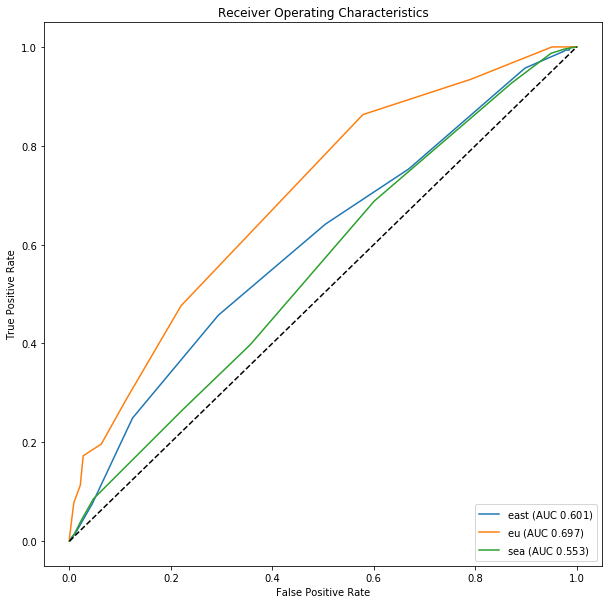

In [65]:
lucem_illud_2020.plotMultiROC(knn_ng, test_ng_df)

Knn performs alright in comparison to prior models; not the best but also not the worst. 

### Extrapolation

In [67]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(tsuki_extra['content'])
tsuki_extra['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
tsuki_extra['knn_predict'] = knn_ng.predict(np.stack(tsuki_extra['vect'], axis=0))

tsuki_extra[['knn_predict']][20:30]

/Users/wanitchaya.poon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/wanitchaya.poon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,knn_predict
205,east
206,east
207,east
208,east
215,eu
216,east
221,east
224,east
225,east
230,east


# Neural Nets

## <span style="color:red">*Exercise 5*</span>

<span style="color:red">In the cells immediately following, perform a neural network classification and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). How does this classify relevant to *k*-nearest neighbor, Naive Bayes, logistic and decision-tree approaches?

In [68]:
nn_ng = sklearn.neural_network.MLPClassifier()
nn_ng.fit(np.stack(train_ng_df['vect'], axis = 0), train_ng_df['category'])

/Users/wanitchaya.poon/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [69]:
train_ng_df['nn_predict'] = nn_ng.predict(np.stack(train_ng_df['vect'], axis=0))
print("Training score:")
print(nn_ng.score(np.stack(train_ng_df['vect'], axis=0), train_ng_df['category']))

Training score:
0.8140108534780464


In [70]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_ng_df['content'])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_ng_df['nn_predict'] = nn_ng.predict(np.stack(test_ng_df['vect'], axis=0))

#Test
print("Testing score:")
print(nn_ng.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))

Testing score:
0.5529953917050692


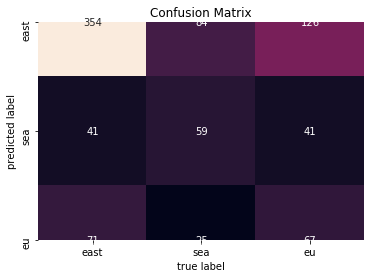

In [71]:
lucem_illud_2020.plotConfusionMatrix(nn_ng, test_ng_df)

In [565]:
print(sklearn.metrics.precision_score(test_ng_df['category'], test_ng_df['nn_predict'], average = 'weighted')) #precision
print(sklearn.metrics.recall_score(test_ng_df['category'], test_ng_df['nn_predict'], average = 'weighted')) #recall
print(sklearn.metrics.f1_score(test_ng_df['category'], test_ng_df['nn_predict'], average = 'weighted')) #F-1 measure

0.5200600249801595
0.5506912442396313
0.527438216505065


In [72]:
lucem_illud_2020.metrics.evaluateClassifier(nn_ng, test_ng_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
east,0.370968,0.618634,0.627660,0.605838,0.759657
sea,0.302995,0.567453,0.411043,0.310088,0.286325
eu,0.220046,0.617024,0.418440,0.272528,0.351190


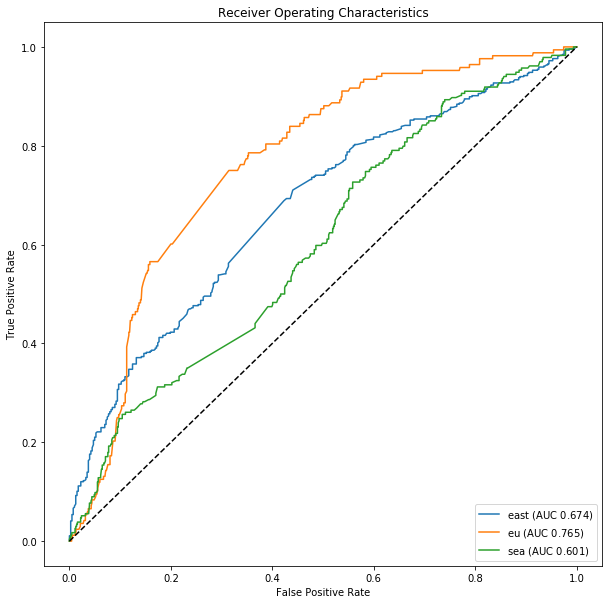

In [73]:
lucem_illud_2020.plotMultiROC(nn_ng, test_ng_df)

Neural Net's training score is pretty good! However, it still struggles on testing. Similar to Random Forest, it is not as bias toward East Asian label as the other models. I think Neural Net has the advantage of being flexible and hence might be able to handle something less obvious than topic as linguistic style.

In general, none of the model works super well is probably due to the nature of this classification and how the available features are not enough for this certain task.

### Extrapolation

In [74]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(tsuki_extra['content'])
tsuki_extra['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
tsuki_extra['nn_predict'] = nn_ng.predict(np.stack(tsuki_extra['vect'], axis=0))

tsuki_extra[['nn_predict']][20:30]

/Users/wanitchaya.poon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/wanitchaya.poon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,nn_predict
205,east
206,east
207,east
208,east
215,eu
216,eu
221,east
224,east
225,sea
230,eu


## Extrapolation So Far

In [82]:
tsuki_extra[['Mnb_predict','logit_predict','tree_predict','rf_predict','bg_predict','knn_predict','nn_predict']][20:30]

,Mnb_predict,logit_predict,tree_predict,rf_predict,bg_predict,knn_predict,nn_predict
205,east,east,east,east,east,east,east
206,east,east,east,east,east,east,east
207,east,east,east,east,east,east,east
208,east,east,east,east,east,east,east
215,eu,eu,eu,eu,east,eu,eu
216,east,east,east,eu,east,east,eu
221,east,east,east,eu,east,east,east
224,east,east,east,east,east,east,east
225,sea,sea,east,sea,east,east,sea
230,east,east,east,eu,east,east,eu


Surprisingly, most of the models agree on each extrapolation. Maybe it is a good idea to choose the classification based on several models together (with higher weight on random forest and neural net?)!

# EXTRA: Semi-Supervised

Since more than half of my data is not labeled, I will try using the semi-supervised model introduced in exercise 1.

In [147]:
tsuki_extra['category'] = -1.
tsuki_no_label = tsuki_extra.iloc[:, 0:8]

/Users/wanitchaya.poon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [148]:
tsuki_no_label['tokenized_text'] = tsuki_no_label['content'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
tsuki_no_label['normalized_text'] = tsuki_no_label['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

In [149]:
tsuki_label['category'] = tsuki_label['category'].replace('east', 0)
tsuki_label['category'] = tsuki_label['category'].replace('sea', 1)
tsuki_label['category'] = tsuki_label['category'].replace('eu', 2)
tsuki_semi = tsuki_label.append(tsuki_no_label)

/Users/wanitchaya.poon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/wanitchaya.poon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/wanitchaya.poon/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [150]:
holdBackFraction = .3
train_ng_df, test_ng_df = lucem_illud_2020.trainTestSplit(tsuki_semi, holdBackFraction=holdBackFraction)

In [151]:
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform(train_ng_df['content'])
train_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]

In [152]:
semi_ng = sklearn.semi_supervised.LabelPropagation()
semi_ng.fit(np.stack(train_ng_df['vect'], axis = 0), train_ng_df['category'])

/Users/wanitchaya.poon/opt/anaconda3/lib/python3.7/site-packages/sklearn/semi_supervised/label_propagation.py:288: ConvergenceWarning: max_iter=1000 was reached without convergence.
  category=ConvergenceWarning


LabelPropagation(gamma=20, kernel='rbf', max_iter=1000, n_jobs=None,
                 n_neighbors=7, tol=0.001)

In [153]:
train_ng_df['semi_predict'] = semi_ng.predict(np.stack(train_ng_df['vect'], axis=0))
print("Training score:")
print(semi_ng.score(np.stack(train_ng_df['vect'], axis=0), train_ng_df['category']))

Training score:
0.4863436123348018


In [154]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_ng_df['content'])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_ng_df['semi_predict'] = semi_ng.predict(np.stack(test_ng_df['vect'], axis=0))

#Test
print("Testing score:")
print(semi_ng.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))

Testing score:
0.341329677861549


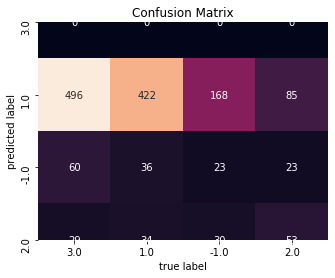

In [155]:
lucem_illud_2020.plotConfusionMatrix(semi_ng, test_ng_df)

In [157]:
print(sklearn.metrics.precision_score(test_ng_df['category'], test_ng_df['semi_predict'], average = 'weighted')) #precision
print(sklearn.metrics.recall_score(test_ng_df['category'], test_ng_df['semi_predict'], average = 'weighted')) #recall
print(sklearn.metrics.f1_score(test_ng_df['category'], test_ng_df['semi_predict'], average = 'weighted')) #F-1 measure

0.18611778462086348
0.341329677861549
0.22843949423446352


/Users/wanitchaya.poon/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/wanitchaya.poon/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [158]:
lucem_illud_2020.metrics.evaluateClassifier(semi_ng, test_ng_df)

/Users/wanitchaya.poon/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
1.0,0.561343,0.541582,0.360376,0.357081,0.857724
2.0,0.217272,0.503975,0.161972,0.152566,0.104072
3.0,0.137766,0.628772,0.363014,0.193525,0.329193
-1.0,0.400960,0.500000,0.000000,0.400960,0.000000


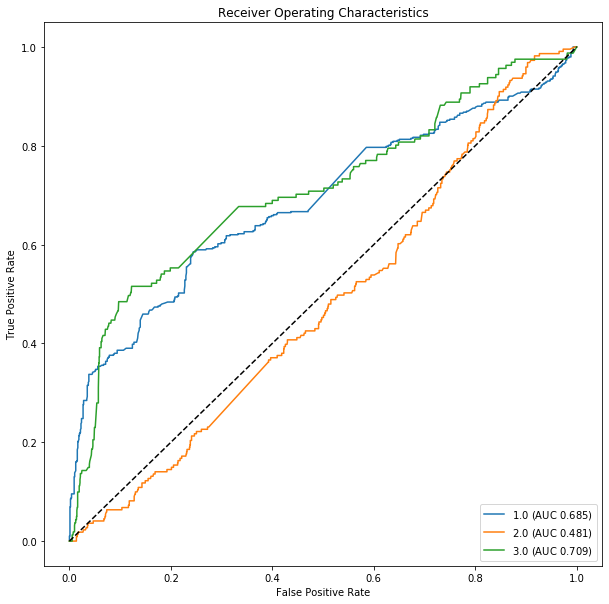

In [159]:
lucem_illud_2020.plotMultiROC(semi_ng, test_ng_df)

Actually, the semi-supervised model performs the *worst*. I think this method only works well when there actually are some latent patterns. So maybe the result is telling me there is no such pattern in this dataset... :(